In [86]:
from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier # 분류
from sklearn.neighbors import KNeighborsRegressor  # 회귀-예측
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [87]:
# df = pd.read_csv('../z20_data/diabetes.csv')
df = pd.read_csv('diabetes.csv')
# 판다스에서 넘파이로 변경
# np_arr = df.to_numpy()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [89]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [90]:
df['SkinThickness']<5

0      False
1      False
2       True
3      False
4      False
       ...  
763    False
764    False
765    False
766     True
767    False
Name: SkinThickness, Length: 768, dtype: bool

In [91]:
# df.isnull() #null값 확인

In [92]:
# df.Outcome
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

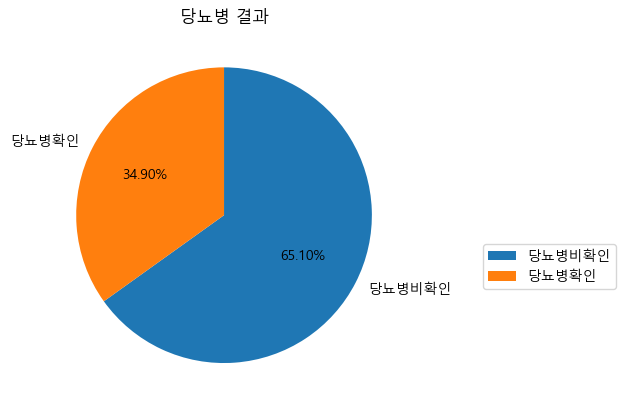

In [93]:
# pie 그래프로 출력하시오.
labels = ['당뇨병비확인','당뇨병확인']
plt.pie(df['Outcome'].value_counts(),labels=labels, autopct='%.2f%%',startangle=90,counterclock=False)
plt.title("당뇨병 결과")
plt.legend(loc=(1.2,0.3))
plt.show()


In [94]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

C:\Users\KOREAVC\AppData\Local\Temp\ipykernel_6208\239822374.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],ax=axs[0,0])
C:\Users\KOREAVC\AppData\Local\Temp\ipykernel_6208\239822374.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Pregnancies'],ax=axs[0,1])
C:\Users\KOREAVC

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Density'>

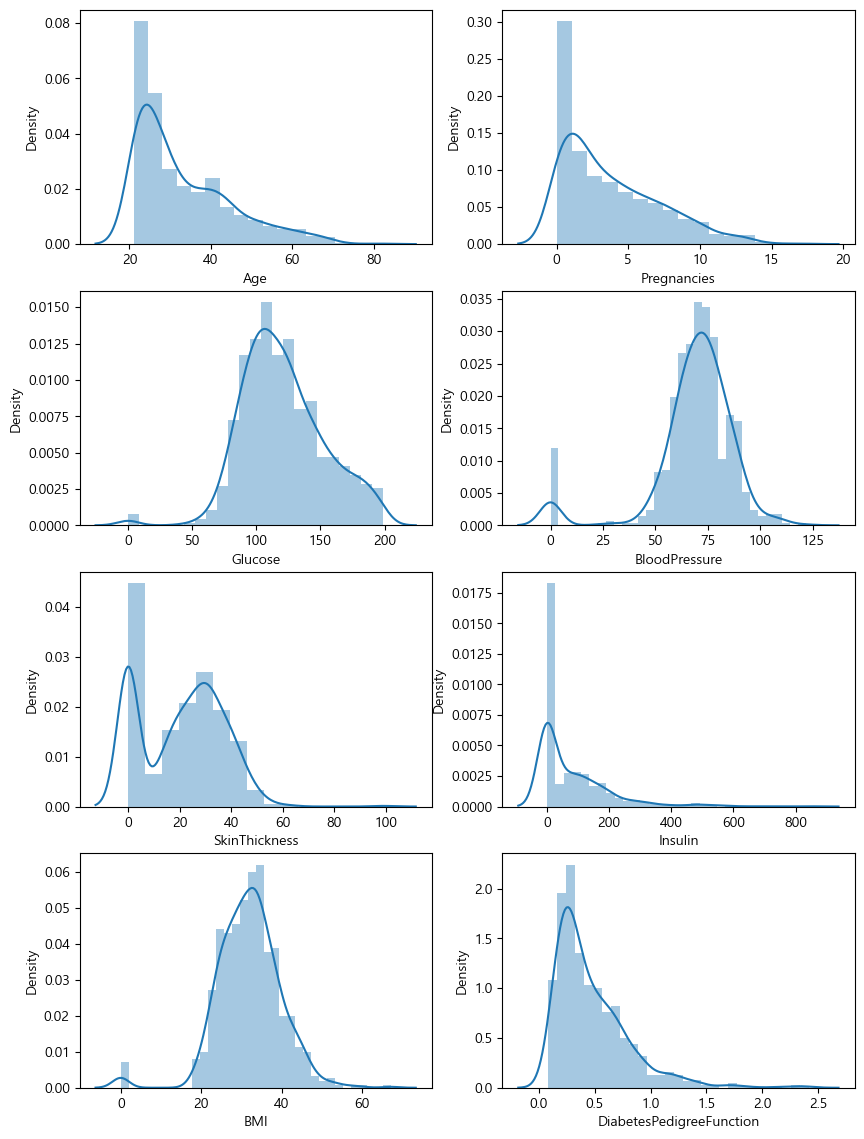

In [99]:
# 0데이터가 있는지, 0데이터가 어느정도비율인지 확인
# 각 특성별 그래프를 출력하시오.
# fig,axs = plt.subplots(4,2,figsize=(10,8))
import seaborn as sns
fig,axs = plt.subplots(4,2,figsize=(10,14))
# axs[0,0].bar(df['Age'],df.index)
# 다이어그램 x,y축을 넣어서 하는 것이 아니라, x축 데이터만 입력하면 그래프 출력
sns.distplot(df['Age'],ax=axs[0,0]) 
sns.distplot(df['Pregnancies'],ax=axs[0,1]) 
sns.distplot(df['Glucose'],ax=axs[1,0]) 
sns.distplot(df['BloodPressure'],ax=axs[1,1]) 
sns.distplot(df['SkinThickness'],ax=axs[2,0]) 
sns.distplot(df['Insulin'],ax=axs[2,1]) 
sns.distplot(df['BMI'],ax=axs[3,0]) 
sns.distplot(df['DiabetesPedigreeFunction'],ax=axs[3,1]) 

In [100]:
# 각 특성별 영향도를 확인하는 함수
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

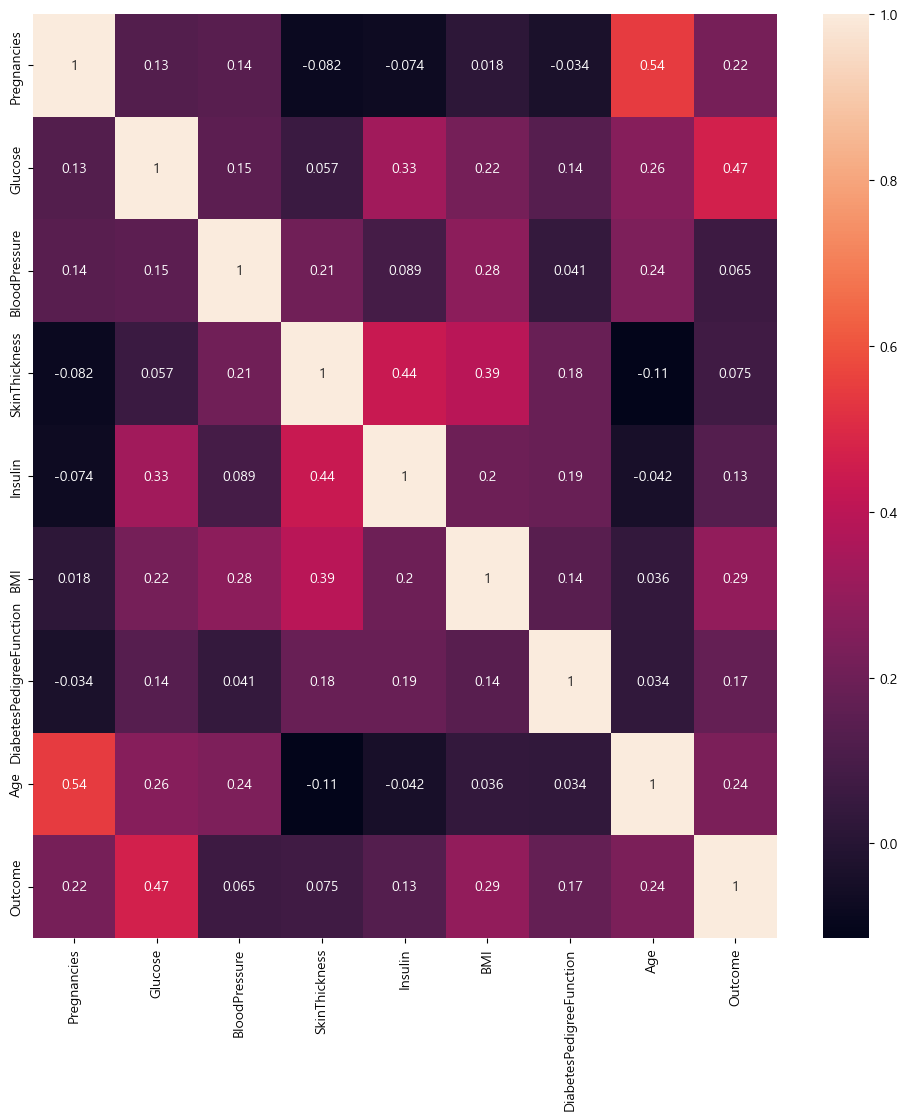

In [102]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True) # 각특성별 영향도와 데이터 수치 출력

In [106]:
# 머신러닝
# 1. 데이터 전처리 - train,test세트 분리
results = df['Outcome']
data = df.iloc[:,:-1]


In [118]:
train_input,test_input,train_target,test_target = train_test_split(data,results,random_state=40)
train_input

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
563,6,99,60,19,54,26.9,0.497,32
739,1,102,74,0,0,39.5,0.293,42
554,1,84,64,23,115,36.9,0.471,28
720,4,83,86,19,0,29.3,0.317,34
652,5,123,74,40,77,34.1,0.269,28
...,...,...,...,...,...,...,...,...
440,0,189,104,25,0,34.3,0.435,41
165,6,104,74,18,156,29.9,0.722,41
7,10,115,0,0,0,35.3,0.134,29
219,5,112,66,0,0,37.8,0.261,41


In [119]:
# 학습하기
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(train_input,train_target)

RandomForestClassifier()

In [120]:
# 예측하기
predict = rfc.predict(test_input)
predict

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [122]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [121]:
# 예측률
score = rfc.score(test_input,test_target)
score

0.75

In [124]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [123]:
# 특성(피처) 중요도
rfc.feature_importances_

array([0.10074221, 0.23822301, 0.09224751, 0.07346256, 0.06829059,
       0.15595063, 0.13746156, 0.13362194])

In [141]:
# 각 특성의 영향도를 체크해서 다른 특성으로 변경
df_import = pd.DataFrame([df.columns[:-1],rfc.feature_importances_])
df_import = df_import.T
df_import.sort_values(1,ascending=False,inplace=True)
df_import

,0,1
1,Glucose,0.238223
5,BMI,0.155951
6,DiabetesPedigreeFunction,0.137462
7,Age,0.133622
0,Pregnancies,0.100742
2,BloodPressure,0.092248
3,SkinThickness,0.073463
4,Insulin,0.068291


In [144]:
df_import[1]

1    0.238223
5    0.155951
6    0.137462
7    0.133622
0    0.100742
2    0.092248
3    0.073463
4    0.068291
Name: 1, dtype: object

<BarContainer object of 8 artists>

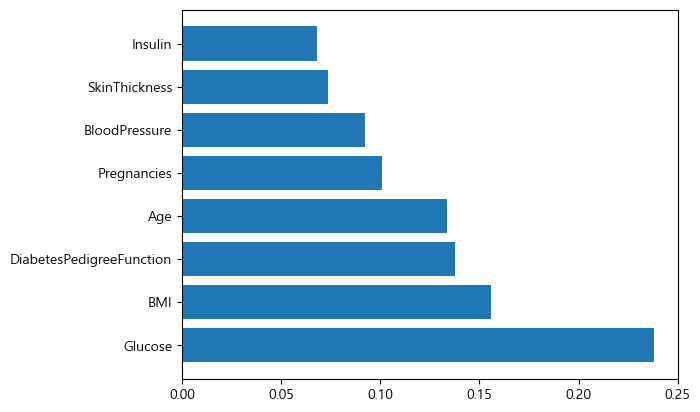

In [145]:
plt.barh(df_import[0],df_import[1])

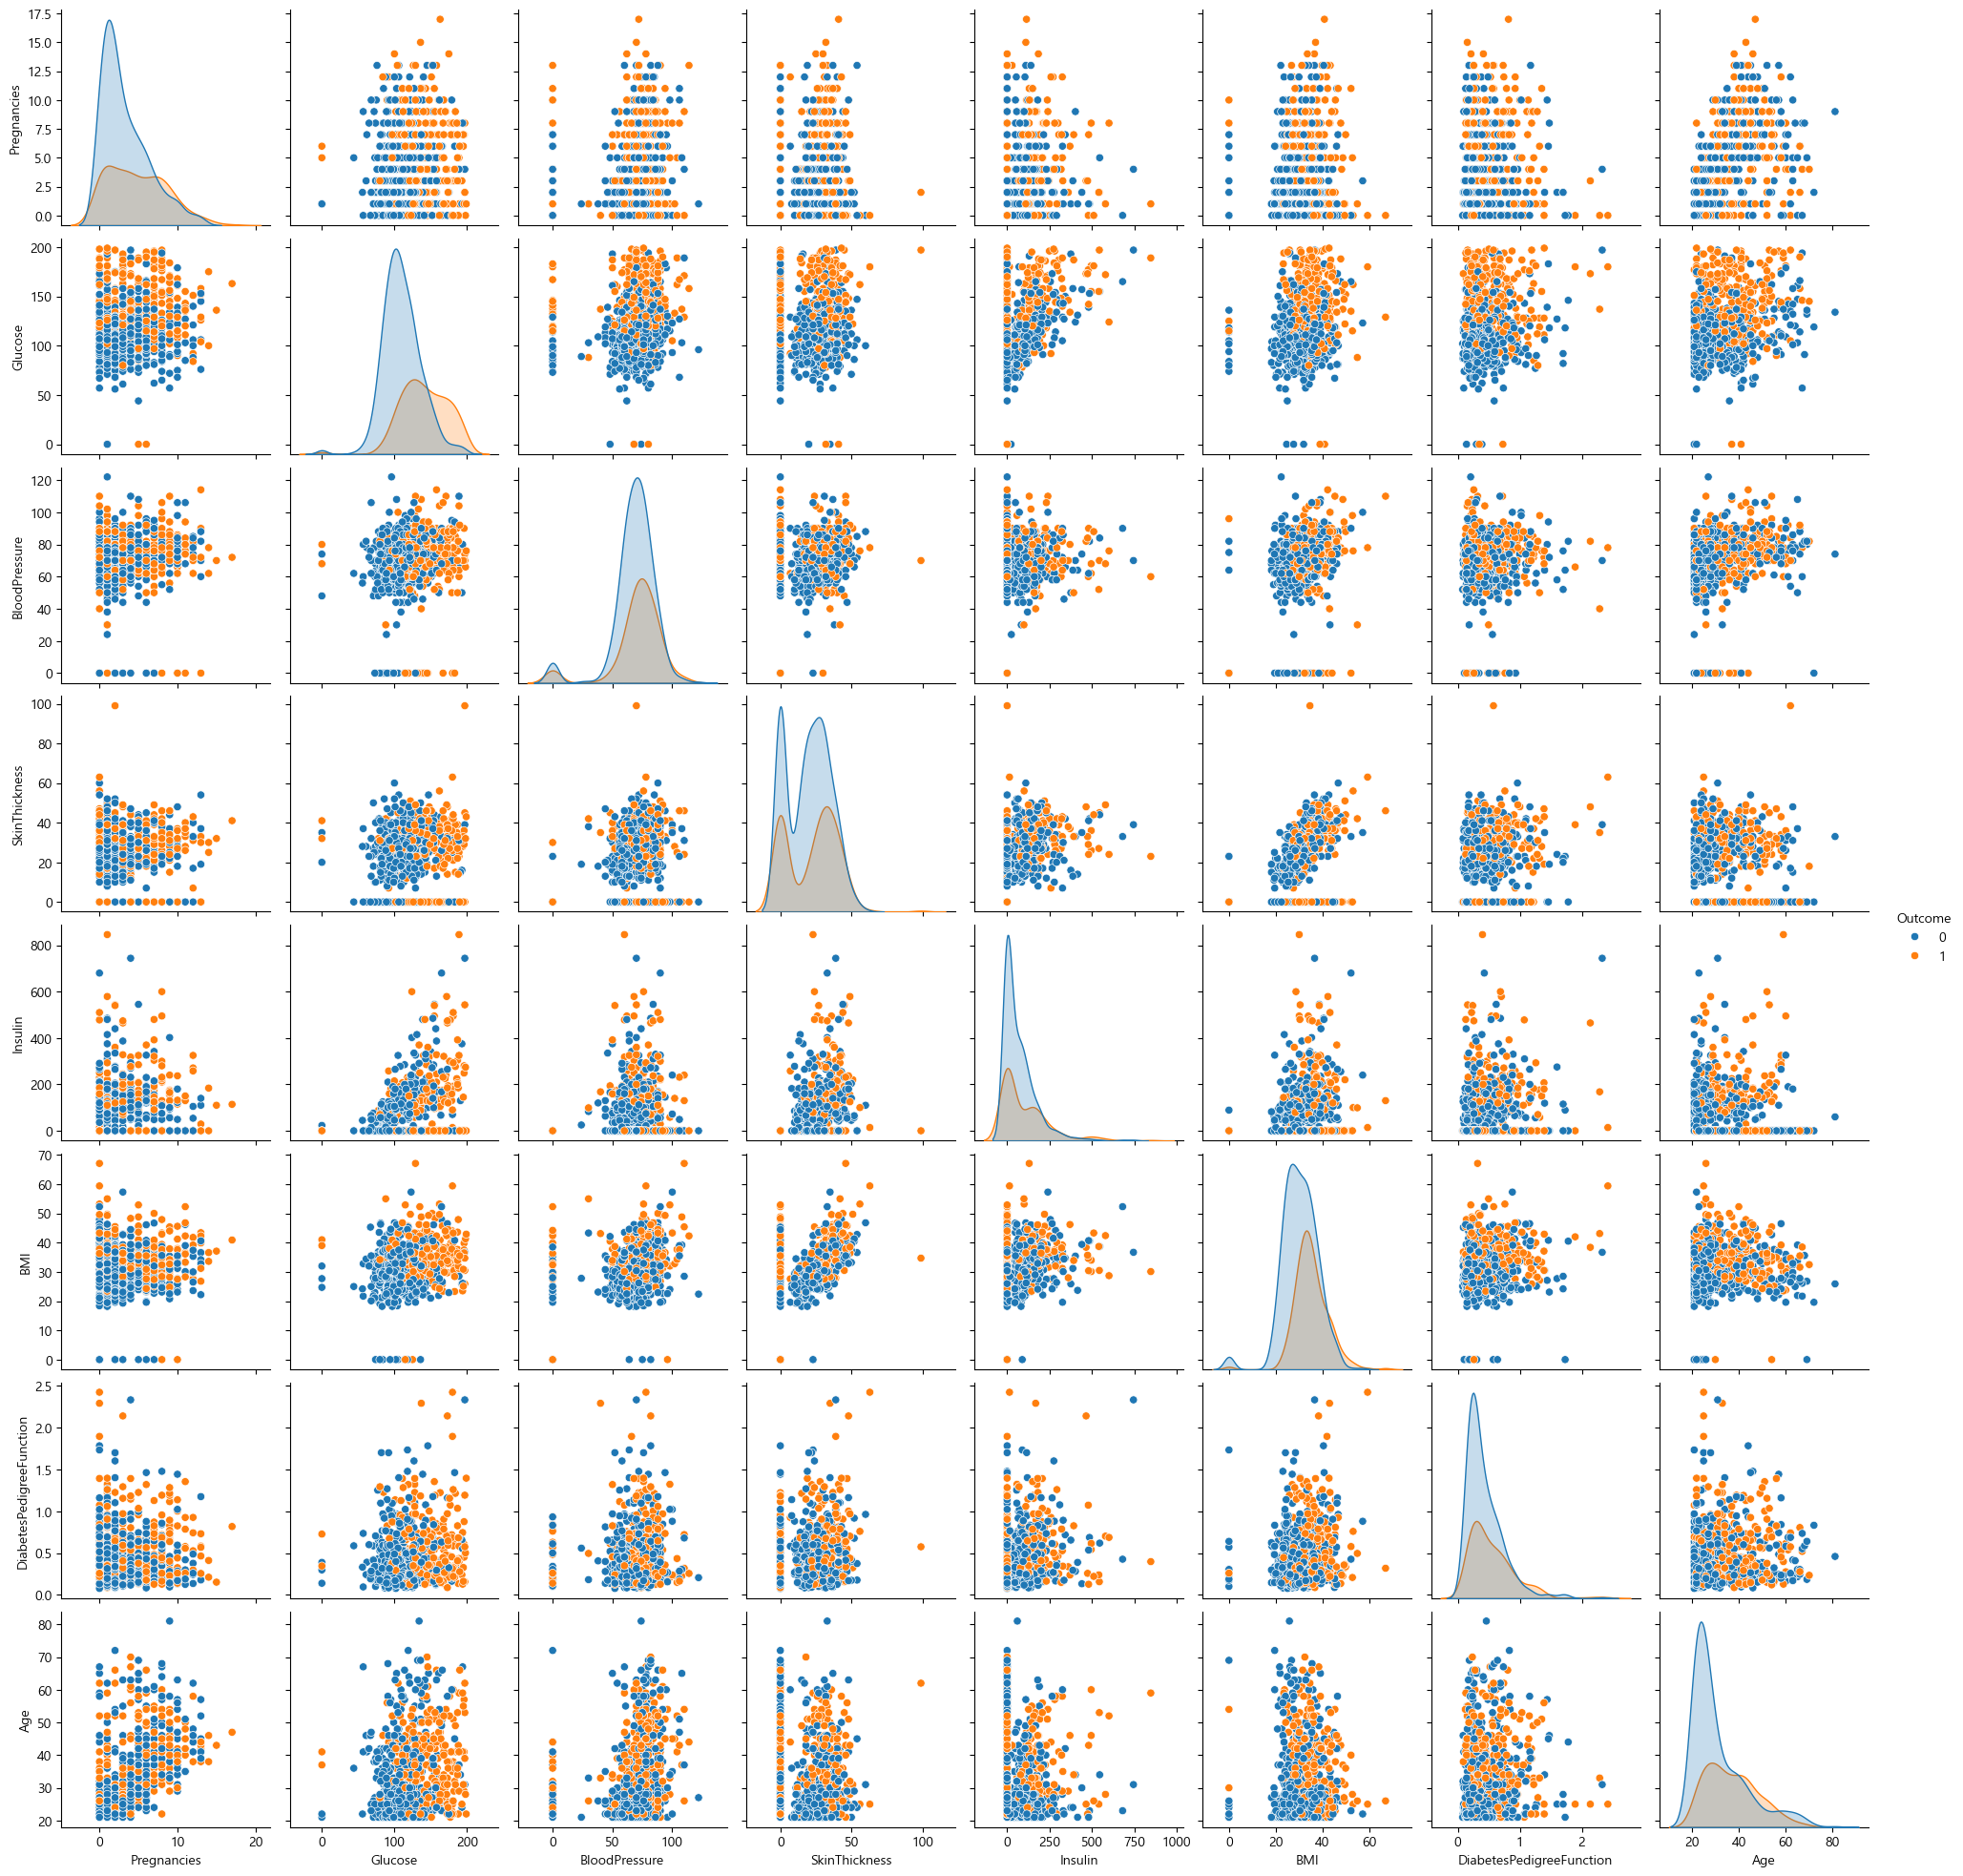

In [146]:
sns.pairplot(df,hue='Outcome')

In [156]:
df_zero_to_mean = df

In [157]:
df_zero_to_mean['Glucose'].mean()

121.6867627785059

In [153]:
# 각 특성별 0의 데이터 처리
# Nan -> 0으로 처리
# Nan -> 평균으로 처리
# Nan데이터 아니고, 0의 데이터여서, 0의 데이터를 Nan으로 변경


# df_zero_to_mean['Glucose'].sort_values().head(10)
# 1. 0의 데이터를 NaN
df_zero_to_mean['Glucose'].replace(0,np.NaN,inplace=True)
df_zero_to_mean['BloodPressure'].replace(0,np.NaN,inplace=True)
df_zero_to_mean['SkinThickness'].replace(0,np.NaN,inplace=True)
df_zero_to_mean['Insulin'].replace(0,np.NaN,inplace=True)
df_zero_to_mean['BMI'].replace(0,np.NaN,inplace=True)


C:\Users\KOREAVC\AppData\Local\Temp\ipykernel_6208\2690423886.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_zero_to_mean['BloodPressure'].replace(0,np.NaN,inplace=True)
C:\Users\KOREAVC\AppData\Local\Temp\ipykernel_6208\2690423886.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [ ]:
121.6867627785059

In [155]:
df_zero_to_mean['Glucose'].mean()

121.6867627785059

In [158]:
df_zero_to_mean['Glucose'].fillna(df_zero_to_mean['Glucose'].mean(),inplace=True)
df_zero_to_mean['BloodPressure'].fillna(df_zero_to_mean['BloodPressure'].mean(),inplace=True)
df_zero_to_mean['SkinThickness'].fillna(df_zero_to_mean['SkinThickness'].mean(),inplace=True)
df_zero_to_mean['Insulin'].fillna(df_zero_to_mean['Insulin'].mean(),inplace=True)
df_zero_to_mean['BMI'].fillna(df_zero_to_mean['BMI'].mean(),inplace=True)

C:\Users\KOREAVC\AppData\Local\Temp\ipykernel_6208\198637341.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_zero_to_mean['BMI'].fillna(df_zero_to_mean['BMI'].mean(),inplace=True)


In [159]:
df_zero_to_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [160]:
df_zero_to_mean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [ ]:
df_zero_to_mean['Outcome']
df_zero_to_mean.iloc[:,:-1]


In [161]:
# 데이터 전처리 - train,test세트
train_input,test_input,train_target,test_target = train_test_split(\
    df_zero_to_mean.iloc[:,:-1],df_zero_to_mean['Outcome'],random_state=40
    )

In [162]:
# 훈련시키기
rfc = RandomForestClassifier()
rfc.fit(train_input,train_target)


RandomForestClassifier()

In [163]:
# 예측하기
predict = rfc.predict(test_input)
predict


array([1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [164]:
# 예측률
score = rfc.score(test_input,test_target)
score

0.7447916666666666